In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize


In [31]:
def plot_function(px, py, nx, ny, c1, c2, xmin, xmax, ymin, ymax, label1, label2):
    plt.scatter(px, py, c='k', s=50, label=c1)
    plt.scatter(nx, ny, c='y', s=50, label=c2)

    plt.gca().set_xlim([xmin, xmax])
    plt.gca().set_ylim([ymin, ymax])
    plt.gca().set_xlabel(label1)
    plt.gca().set_ylabel(label2)
    plt.gca().legend(bbox_to_anchor=(1.0, 1.0), fancybox=True)

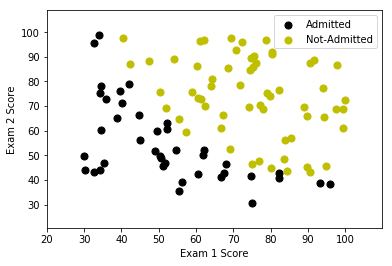

In [32]:
data = pd.read_csv('data/ex2data1.txt', header=None)
data.columns = ['exam1', 'exam2', 'admitted']
plot_function(data[data.admitted == 0]['exam1'], data[data.admitted == 0]['exam2'], data[data.admitted == 1]['exam1'],
              data[data.admitted == 1]['exam2'], "Admitted", "Not-Admitted", data['exam1'].min() - 10,
              data['exam1'].max() + 10, data['exam2'].min() - 10, data['exam2'].max() + 10, "Exam 1 Score",
              "Exam 2 Score")

In [33]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [34]:
def costFunction(theta, x, y):
    m = x.shape[0]
    predicted_value = sigmoid(np.dot(x, theta))
    cost = (-1 / m) * (np.dot(y.T, np.log(predicted_value)) + np.dot((1 - y).T, np.log(1 - predicted_value)))

    if np.isnan(cost[0]):
        return (np.inf)

    return cost[0]


In [35]:
def gradientDescent(theta, x, y):
    m = x.shape[0]
    n = x.shape[1]
    theta = np.array(theta).reshape(n, 1)
    predicted_value = sigmoid(np.dot(x, theta))
    diffrence = (predicted_value - y)
    theta = ((1 / m) * np.dot(diffrence.T, x)).T.flatten()
    return theta

In [36]:
def predict(theta, x, threshold=0.5):
    return (sigmoid(np.dot(x, theta)) >= 0.5).astype('int')

In [37]:
def poly_features(X, deg):
    x1 = X[:, 0]
    x2 = X[:, 1]
    features = X
    count = 0
    for i in range(2, deg + 1):
        for j in range(0, i + 1):
            count += 1
            column = np.array(x1 ** (i - j) * x2 ** j).reshape(X.shape[0], 1)
            features = np.hstack((features, column))
    features = np.insert(features, 0, 1, axis=1)
    return features

In [38]:
def reg_cost_function ( theta, x, y, lmda ):
    theta = theta.reshape(theta.shape[0],1)
    m = x.shape[0]
    predicted_value = sigmoid(np.dot(x, theta))
    reg_theta = np.delete(theta,0,axis=0)
    cost = (-1 / m) * (np.dot(y.T, np.log(predicted_value)) + np.dot((1 - y).T, np.log(1 - predicted_value))) +(lmda / (2 * m)) * np.sum(np.square(reg_theta))
    if np.isnan(cost[0]):
        return (np.inf)

    return cost[0]

In [39]:
def reg_gradient_function ( theta, x, y, lmda ):
    m = x.shape[0]
    n = x.shape[1]
    theta = np.array(theta).reshape(n, 1)
    predicted_value = sigmoid(np.dot(x, theta))
    diffrence = (predicted_value - y)
    reg_theta = np.insert(np.delete((lmda / m) * theta, 0, axis=0),0,0,axis=0)
    optimized_theta = ((1 / m) * np.dot(diffrence.T, x).T + reg_theta).flatten()
    return optimized_theta

In [40]:
x = np.array(data[['exam1', 'exam2']])
m = x.shape[0]
n = x.shape[1]
y = np.array(data['admitted']).reshape(m, 1)
theta = np.zeros([3, 1])
x = np.insert(x, 0, 1, axis=1)


In [41]:
cost = costFunction(theta, x, y)
theta = gradientDescent(theta, x, y)
print(theta)

[ -0.1        -12.00921659 -11.26284221]


In [42]:
logistic_regression = minimize(fun=costFunction, x0=np.zeros([3, 1]),
                               args=(x, y), jac=gradientDescent, options={'maxiter': 400})
print(logistic_regression)

      fun: 0.2034977015895099
 hess_inv: array([[  2.85339493e+03,  -2.32908823e+01,  -2.27416470e+01],
       [ -2.32908823e+01,   2.04489131e-01,   1.72969525e-01],
       [ -2.27416470e+01,   1.72969525e-01,   1.96170322e-01]])
      jac: array([ -2.68557636e-09,   4.36433477e-07,  -1.39671758e-06])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])


/Users/nishant/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/nishant/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [43]:
theta = logistic_regression.x.reshape(n + 1, 1)

In [44]:
# example with marks - exam1 - 45,exam2 - 85
probability = sigmoid(np.dot(np.array([1, 45, 85]), theta))
print(probability)

[ 0.77629032]


In [45]:
p = predict(theta, x)
print('Training Score : {0}%'.format((y[y == p].shape[0] * 100) / y.shape[0]))

Training Score : 89.0%


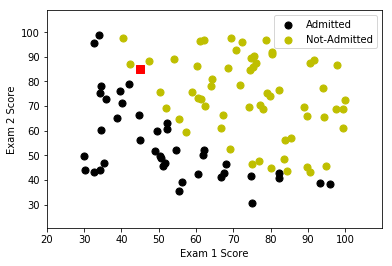

In [46]:
plot_function(data[data.admitted == 0]['exam1'], data[data.admitted == 0]['exam2'], data[data.admitted == 1]['exam1'],
              data[data.admitted == 1]['exam2'], "Admitted", "Not-Admitted", data['exam1'].min() - 10,
              data['exam1'].max() + 10, data['exam2'].min() - 10, data['exam2'].max() + 10, "Exam 1 Score",
              "Exam 2 Score")
plt.scatter(45, 85, s=50, c='r', marker='s', label='"Test" data')

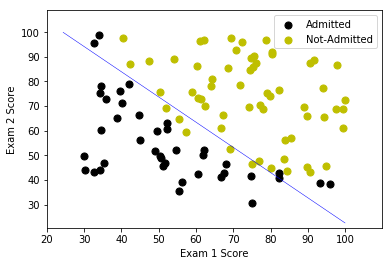

In [48]:
plot_function(data[data.admitted == 0]['exam1'], data[data.admitted == 0]['exam2'], data[data.admitted == 1]['exam1'],
              data[data.admitted == 1]['exam2'], "Admitted", "Not-Admitted", data['exam1'].min() - 10,
              data['exam1'].max() + 10, data['exam2'].min() - 10, data['exam2'].max() + 10, "Exam 1 Score",
              "Exam 2 Score")
xx1, xx2 = np.meshgrid(np.linspace(0, 100), np.linspace(0, 100))
# Grid of all points (2500 by default) in the mesh, with entry of 1 in front ( for theta0 )
X_grid = np.c_[np.ones((np.ravel(xx1).shape[0], 1)), np.ravel(xx1), np.ravel(xx2)]
h = sigmoid(X_grid.dot(logistic_regression.x))
h = h.reshape(xx1.shape)

plt.contour(xx1, xx2, h, [0.5], linewidths=0.5, colors='b')

In [49]:
data = pd.read_csv('data/ex2data2.txt', header=None)
data.columns = ['chip1', 'chip2', 'y']

In [50]:
X = np.array(data[['chip1', 'chip2']])
y = np.array(data['y'])

features = poly_features(X, 6)

In [51]:
m = features.shape[0]
n = features.shape[1]

y = y.reshape(m,1)


theta = np.zeros([n, 1])

In [52]:
cost = reg_cost_function(theta, features, y,1)
print(cost)
theta = reg_gradient_function(theta, features, y,1)
print(theta)

[ 0.69314718]
[  8.47457627e-03   1.87880932e-02   7.77711864e-05   5.03446395e-02
   1.15013308e-02   3.76648474e-02   1.83559872e-02   7.32393391e-03
   8.19244468e-03   2.34764889e-02   3.93486234e-02   2.23923907e-03
   1.28600503e-02   3.09593720e-03   3.93028171e-02   1.99707467e-02
   4.32983232e-03   3.38643902e-03   5.83822078e-03   4.47629067e-03
   3.10079849e-02   3.10312442e-02   1.09740238e-03   6.31570797e-03
   4.08503006e-04   7.26504316e-03   1.37646175e-03   3.87936363e-02]


In [53]:
reg_logistic_regression = minimize(fun=reg_cost_function, x0=np.zeros([n, 1]),
                               args=(features, y,1), jac=reg_gradient_function, options={'maxiter': 400})
print(reg_logistic_regression)


      fun: 0.5290027422869217
 hess_inv: array([[  1.07914459e+01,   1.00370134e+00,   1.21057597e+00,
         -8.74612304e+00,  -2.24476234e+00,  -1.30928770e+01,
          7.84297774e-01,  -1.64458964e+00,  -2.48377276e-01,
         -6.52804934e-01,  -4.71782992e+00,   2.58090129e+00,
         -4.03086221e+00,   1.03695104e-01,  -5.05427604e+00,
         -6.82360126e-02,  -2.45505447e-02,   8.83292432e-01,
         -1.68341536e+00,  -5.50856476e-01,   2.14265744e+00,
         -2.31021183e+00,   2.03047279e+00,  -1.59242276e+00,
          1.32651853e+00,  -1.98877507e+00,   2.80730511e-01,
          5.99591174e-01],
       [  1.00370134e+00,   1.28889754e+01,   4.31839874e+00,
         -6.95995281e+00,  -7.08201337e+00,  -3.92029202e-03,
          1.69141341e+00,   7.17737681e-01,   2.99492672e+00,
         -3.00897829e+00,  -3.78374906e+00,  -2.07471726e-01,
          9.68383482e-01,  -1.53929603e+00,  -7.57663155e-01,
         -5.27877013e-01,   5.65484974e-01,   1.54975987e+00,
  

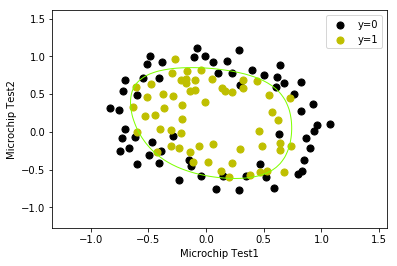

In [57]:
plot_function(data[data.y == 0]['chip1'], data[data.y == 0]['chip2'], data[data.y == 1]['chip1'],
              data[data.y == 1]['chip2'], "y=0", "y=1", data['chip1'].min() - 0.5, data['chip1'].max() + 0.5,
              data['chip2'].min() - 0.5, data['chip2'].max() + 0.5, "Microchip Test1", "Microchip Test2")
xx1, xx2 = np.meshgrid(np.linspace(data['chip1'].min(), data['chip1'].max()), np.linspace(data['chip2'].min(), data['chip2'].max()))

# Grid of all points (2500 by default) in the mesh, with entry of 1 in front ( for theta0 )
X_grid = np.c_[np.ravel(xx1), np.ravel(xx2) ]
X_grid = poly_features(X_grid,6)
h = sigmoid( X_grid.dot(reg_logistic_regression.x) )
h = h.reshape(xx1.shape)

plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='chartreuse')